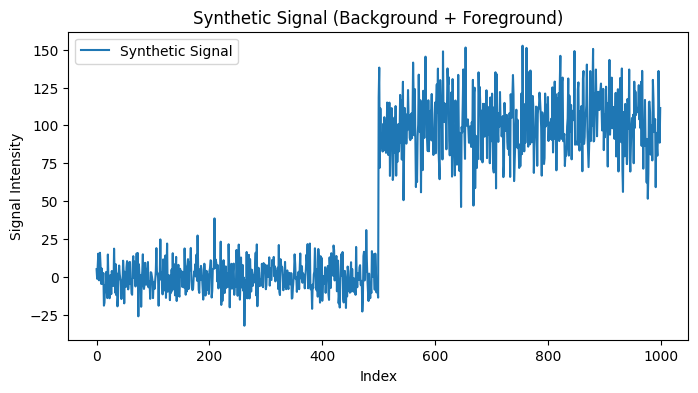

Iteration 0, Best Fitness: 2530.0696446605907
Iteration 10, Best Fitness: 2530.0770576625023
Iteration 20, Best Fitness: 2530.0770576625023
Iteration 30, Best Fitness: 2530.0770576625023
Iteration 40, Best Fitness: 2530.0770576625023
Iteration 50, Best Fitness: 2530.0770576625023
Iteration 60, Best Fitness: 2530.0770576625023
Iteration 70, Best Fitness: 2530.0770576625023
Iteration 80, Best Fitness: 2530.0770576625023
Iteration 90, Best Fitness: 2530.0770576625023


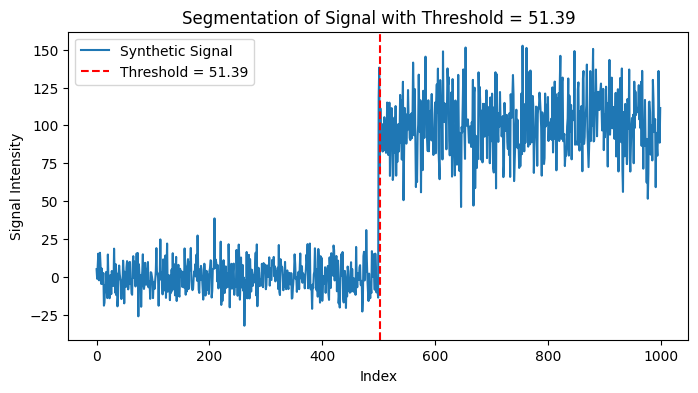

Foreground Segment: [118.52355095 138.18833281  72.02864852 111.25938473  86.98714862
  90.25749232  88.15212152  82.72018461 100.97043256  83.38099767]... (showing first 10 values)
Background Segment: [ 4.96714153 -1.38264301  6.47688538 15.23029856 -2.34153375 -2.34136957
 15.79212816  7.67434729 -4.69474386  5.42560044]... (showing first 10 values)


In [4]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Generate a synthetic 1D signal (e.g., background + foreground signal)
np.random.seed(42)
background = np.random.normal(0, 10, 500)  # Random noise (background)
foreground = np.random.normal(100, 20, 500)  # Stronger signal (foreground)
signal = np.concatenate([background, foreground])

# Plot the synthetic signal
plt.figure(figsize=(8, 4))
plt.plot(signal, label="Synthetic Signal")
plt.title("Synthetic Signal (Background + Foreground)")
plt.xlabel("Index")
plt.ylabel("Signal Intensity")
plt.legend()
plt.show()

# Define the fitness function (Otsu's method) for thresholding
def fitness_function(threshold, signal):
    # Create binary segmentation based on the threshold
    foreground = signal[signal >= threshold]
    background = signal[signal < threshold]

    # Calculate the means of foreground and background
    mean_foreground = np.mean(foreground) if len(foreground) > 0 else 0
    mean_background = np.mean(background) if len(background) > 0 else 0

    # Calculate the variances of foreground and background
    var_foreground = np.var(foreground) if len(foreground) > 0 else 0
    var_background = np.var(background) if len(background) > 0 else 0

    # Calculate the between-class variance
    weight_foreground = len(foreground) / len(signal)
    weight_background = len(background) / len(signal)

    between_class_variance = weight_foreground * weight_background * (mean_foreground - mean_background) ** 2
    return between_class_variance

# Cuckoo Search Algorithm for threshold optimization
def cuckoo_search(signal, num_nests=50, num_iterations=100, pa=0.25):
    # Step 1: Initialize the population (random threshold values between 0 and 255)
    nests = [random.uniform(np.min(signal), np.max(signal)) for _ in range(num_nests)]
    best_solution = None
    best_fitness = -np.inf

    for iteration in range(num_iterations):
        # Step 2: Evaluate fitness for each nest
        fitness_values = []
        for nest in nests:
            fitness = fitness_function(nest, signal)
            fitness_values.append(fitness)
            if fitness > best_fitness:
                best_fitness = fitness
                best_solution = nest

        # Step 3: Abandon the worst nests and replace them with new ones (Lévy flight)
        new_nests = []
        for i in range(num_nests):
            if random.random() > pa:
                new_nest = random.uniform(np.min(signal), np.max(signal))
                new_nests.append(new_nest)
            else:
                # Lévy flight: small perturbation
                step = np.random.normal(0, 1) * 10  # Perturbation step
                new_nests.append(nests[i] + step)

        # Step 4: Keep the best nests
        nests = new_nests

        # Print progress (optional)
        if iteration % 10 == 0:
            print(f"Iteration {iteration}, Best Fitness: {best_fitness}")

    return best_solution

# Run the Cuckoo Search algorithm to find the best threshold
optimal_threshold = cuckoo_search(signal)

# Segment the signal using the optimal threshold
foreground_segment = signal[signal >= optimal_threshold]
background_segment = signal[signal < optimal_threshold]

# Visualize the segmentation
plt.figure(figsize=(8, 4))
plt.plot(signal, label="Synthetic Signal")
plt.axvline(x=len(background_segment), color='r', linestyle='--', label=f"Threshold = {optimal_threshold:.2f}")
plt.title(f"Segmentation of Signal with Threshold = {optimal_threshold:.2f}")
plt.xlabel("Index")
plt.ylabel("Signal Intensity")
plt.legend()
plt.show()

# Optionally, display the foreground and background segments
print(f"Foreground Segment: {foreground_segment[:10]}... (showing first 10 values)")
print(f"Background Segment: {background_segment[:10]}... (showing first 10 values)")

